In [2]:
!pip install h2o

In [3]:
!pip install imbalanced-learn

In [4]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

In [5]:
import pandas as pd
import imblearn
from imblearn.over_sampling import SMOTE
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot

In [6]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
#drop the last two columns
df.drop(df.columns[-2:], axis=1, inplace=True)
#drop client number ids
df.drop(columns=['CLIENTNUM'], inplace=True)

In [8]:
#convert Gender to binary number
genderReplacement = {'M': 1, 'F': 0}
df['Gender'] = df['Gender'].replace(genderReplacement)

card_rank_mapping = {
    'Blue': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
}
education_rank_mapping = {
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'Graduate': 3,
    'College': 4,
    'College': 5,
    'Post-Graduate': 6,
    'Doctorate': 7
}
income_rank_mapping = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}
marriage_rank_mapping = {
    'Unknown': 0,
    'Married': 1,
    'Single': 2,
    'Divorced': 3
}

df['Card_Category'] = df['Card_Category'].replace(card_rank_mapping)
df['Education_Level'] = df['Education_Level'].replace(education_rank_mapping)
df['Income_Category'] = df['Income_Category'].replace(income_rank_mapping)
df['Marital_Status'] = df['Marital_Status'].replace(marriage_rank_mapping)

In [9]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,1,3,2,1,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,0,5,3,2,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,1,3,3,1,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,0,4,2,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,1,3,1,1,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
#convert Attrition_Flag to binary number
attritionFlagReplacement = {'Existing Customer': 1, 'Attrited Customer': 0}
df['Attrition_Flag'] = df['Attrition_Flag'].replace(attritionFlagReplacement)

In [11]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,2,1,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,3,2,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,3,1,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,2,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,1,1,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
count = Counter(y)
print(count)

Counter({1: 8500, 0: 1627})


In [13]:
# Instantiate SMOTE
smote = SMOTE(random_state=1)
# Apply SMOTE to generate synthetic samples
X_balanced, y_balanced = smote.fit_resample(X, y)
# Count the class distribution after applying SMOTE
count_balanced = Counter(y_balanced)
print(count_balanced)

Counter({1: 8500, 0: 8500})


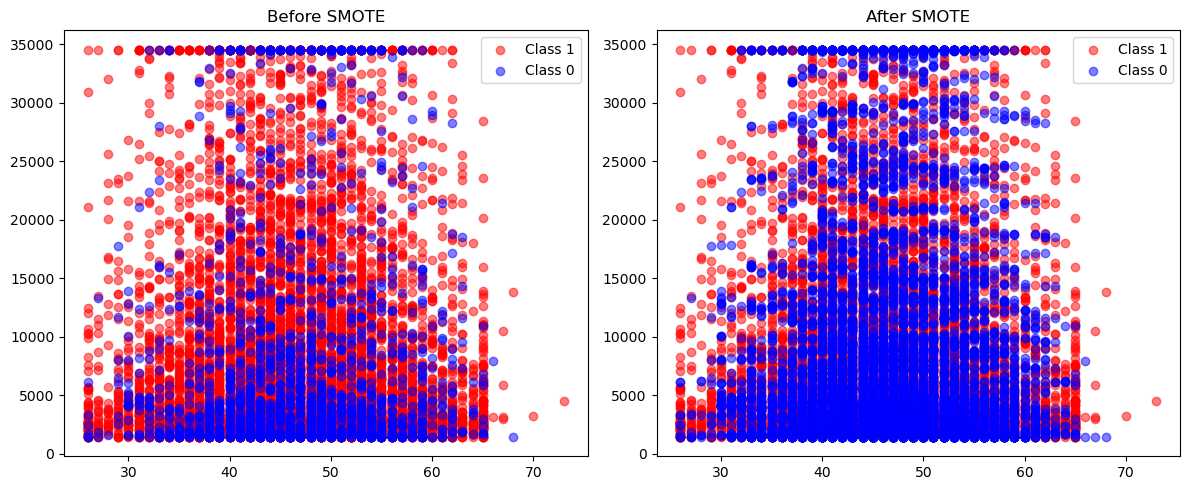

In [14]:
import matplotlib.pyplot as plt

# Create a scatter plot for the original imbalanced dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.title('Before SMOTE')

# Assuming X and y represent the original imbalanced dataset
plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 11], label='Class 1', c='red', alpha=0.5)
plt.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 11], label='Class 0', c='blue', alpha=0.5)
plt.legend()

# Create a scatter plot for the dataset after SMOTE
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.title('After SMOTE')

# Assuming X_balanced and y_balanced represent the dataset after applying SMOTE
plt.scatter(X_balanced[y_balanced == 1].iloc[:, 0], X_balanced[y_balanced == 1].iloc[:, 11], label='Class 1', c='red', alpha=0.5)
plt.scatter(X_balanced[y_balanced == 0].iloc[:, 0], X_balanced[y_balanced == 0].iloc[:, 11], label='Class 0', c='blue', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
#dividing the dataset into test and train set
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify= y_balanced,random_state=42)

In [16]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)
  Starting server from C:\Users\Aksh\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Aksh\AppData\Local\Temp\tmpx5zrhjgb
  JVM stdout: C:\Users\Aksh\AppData\Local\Temp\tmpx5zrhjgb\h2o_Aksh_started_from_python.out
  JVM stderr: C:\Users\Aksh\AppData\Local\Temp\tmpx5zrhjgb\h2o_Aksh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_Aksh_1o5zcx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.812 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [17]:
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [19]:
# Identify the target variable and features
target = 'Attrition_Flag'
features = X_train.columns.tolist()

In [20]:
# Train an AutoML model
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=features, y=target, training_frame=train)

AutoML progress: |
01:39:51.942: AutoML: XGBoost is not available; skipping it.
01:39:52.6: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
01:39:54.531: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████
01:40:05.474: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
01:40:09.189: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/10
# GBM base models (used / total),3/6
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [21]:
# Checking the leaderboard
leaderboard = aml.leaderboard
leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231109_13951,0.138709,0.0192403,0.0696889,0.096626,0.0192403
StackedEnsemble_BestOfFamily_1_AutoML_1_20231109_13951,0.139265,0.0193946,0.0701154,0.0970217,0.0193946
GBM_4_AutoML_1_20231109_13951,0.141894,0.0201338,0.0710961,0.098853,0.0201338
GBM_3_AutoML_1_20231109_13951,0.145232,0.0210924,0.0742244,0.101353,0.0210924
GBM_2_AutoML_1_20231109_13951,0.148566,0.0220719,0.0809869,0.104405,0.0220719
DRF_1_AutoML_1_20231109_13951,0.151216,0.0228662,0.0706995,0.105637,0.0228662
XRT_1_AutoML_1_20231109_13951,0.152854,0.0233642,0.0769832,0.107956,0.0233642
GBM_5_AutoML_1_20231109_13951,0.154144,0.0237602,0.0847448,0.108107,0.0237602
GBM_1_AutoML_1_20231109_13951,0.155645,0.0242254,0.0945873,0.110591,0.0242254
GBM_grid_1_AutoML_1_20231109_13951_model_1,0.156071,0.0243583,0.084289,0.109563,0.0243583


In [22]:
# Getting the best model from the leaderboard
best_model = aml.leader

In [23]:
predictions = best_model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [24]:
predictions = predictions.as_data_frame()

In [25]:
binary_predictions = (predictions['predict'] > 0.5).astype(int)
accuracy = accuracy_score(y_test, binary_predictions)

In [26]:
print('Accuracy:', accuracy)

Accuracy: 0.9826470588235294


In [27]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1681   19]
 [  40 1660]]
